<a href="https://www.kaggle.com/code/mrsimple07/airplane-price-analysis-eda-prediction?scriptVersionId=175042619" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/plane-price-prediction/Plane Price.csv


# Data Importing and Overall Description

In [2]:
import pandas as pd
df = pd.read_csv('/kaggle/input/plane-price-prediction/Plane Price.csv')
df.head()

,Model Name,Engine Type,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,All eng rate of climb,Eng out rate of climb,Takeoff over 50ft,Landing over 50ft,Empty weight lbs,Length ft/in,Wing span ft/in,Range N.M.,Price
0,100 Darter (S.L. Industries),Piston,145,104,91.0,46.0,36,450,900.0,1300.0,"2,050","1,180",25/3,37/5,370,1300000.0
1,7 CCM Champ,Piston,85,89,83.0,44.0,15,600,720.0,800.0,"1,350",820,20/7,36/1,190,1230000.0
2,100 Darter (S.L. Industries),Piston,90,90,78.0,37.0,19,650,475.0,850.0,"1,300",810,21/5,35/0,210,1600000.0
3,7 AC Champ,Piston,85,88,78.0,37.0,19,620,500.0,850.0,"1,300",800,21/5,35/0,210,1300000.0
4,100 Darter (S.L. Industries),Piston,65,83,74.0,33.0,14,370,632.0,885.0,"1,220",740,21/5,35/0,175,1250000.0


In [3]:
df.describe()

,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,Eng out rate of climb,Takeoff over 50ft,Price
count,507.000000,502.000000,517.000000,491.000000,492.000000,5.070000e+02
mean,200.792899,60.795817,1419.379110,2065.126273,1743.306911,2.362673e+06
std,104.280532,16.657002,4278.320773,1150.031899,730.009674,1.018731e+06
min,70.000000,27.000000,12.000000,457.000000,500.000000,6.500000e+05
25%,130.000000,50.000000,50.000000,1350.000000,1265.000000,1.600000e+06
50%,169.000000,56.000000,89.000000,1706.000000,1525.000000,2.000000e+06
75%,232.000000,73.000000,335.000000,2357.000000,2145.750000,2.950000e+06
max,511.000000,115.000000,41000.000000,6400.000000,4850.000000,5.100000e+06


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Model Name               517 non-null    object 
 1   Engine Type              517 non-null    object 
 2   HP or lbs thr ea engine  517 non-null    object 
 3   Max speed Knots          497 non-null    object 
 4   Rcmnd cruise Knots       507 non-null    float64
 5   Stall Knots dirty        502 non-null    float64
 6   Fuel gal/lbs             517 non-null    int64  
 7   All eng rate of climb    513 non-null    object 
 8   Eng out rate of climb    491 non-null    float64
 9   Takeoff over 50ft        492 non-null    float64
 10  Landing over 50ft        517 non-null    object 
 11  Empty weight lbs         516 non-null    object 
 12  Length ft/in             517 non-null    object 
 13  Wing span ft/in          517 non-null    object 
 14  Range N.M.               4

First we check the missing values

In [5]:
df.isnull().sum()

Model Name                  0
Engine Type                 0
HP or lbs thr ea engine     0
Max speed Knots            20
Rcmnd cruise Knots         10
Stall Knots dirty          15
Fuel gal/lbs                0
All eng rate of climb       4
Eng out rate of climb      26
Takeoff over 50ft          25
Landing over 50ft           0
Empty weight lbs            1
Length ft/in                0
Wing span ft/in             0
Range N.M.                 18
Price                      10
dtype: int64

As we can see there are some missing value. And we will fill it with 0.

In [6]:
df = df.dropna()
df.isnull().sum()

Model Name                 0
Engine Type                0
HP or lbs thr ea engine    0
Max speed Knots            0
Rcmnd cruise Knots         0
Stall Knots dirty          0
Fuel gal/lbs               0
All eng rate of climb      0
Eng out rate of climb      0
Takeoff over 50ft          0
Landing over 50ft          0
Empty weight lbs           0
Length ft/in               0
Wing span ft/in            0
Range N.M.                 0
Price                      0
dtype: int64

And now we can process the data

# Exploratory Data Analysis

In [7]:
df.head()

,Model Name,Engine Type,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,All eng rate of climb,Eng out rate of climb,Takeoff over 50ft,Landing over 50ft,Empty weight lbs,Length ft/in,Wing span ft/in,Range N.M.,Price
0,100 Darter (S.L. Industries),Piston,145,104,91.0,46.0,36,450,900.0,1300.0,"2,050","1,180",25/3,37/5,370,1300000.0
1,7 CCM Champ,Piston,85,89,83.0,44.0,15,600,720.0,800.0,"1,350",820,20/7,36/1,190,1230000.0
2,100 Darter (S.L. Industries),Piston,90,90,78.0,37.0,19,650,475.0,850.0,"1,300",810,21/5,35/0,210,1600000.0
3,7 AC Champ,Piston,85,88,78.0,37.0,19,620,500.0,850.0,"1,300",800,21/5,35/0,210,1300000.0
4,100 Darter (S.L. Industries),Piston,65,83,74.0,33.0,14,370,632.0,885.0,"1,220",740,21/5,35/0,175,1250000.0


In [8]:
df_corr= ['Max speed Knots', 'Rcmnd cruise Knots', 'Stall Knots dirty', 'Fuel gal/lbs', 'All eng rate of climb']
df['Max speed Knots'].unique()

array(['104', '89', '90', '88', '83', '78', '264', '262', '257', '271',
       '220', '128', '114', '112', '113', '99', '116', '109', '117',
       '168', '148', '136', '130', '120', '122', '294', '290', '265',
       '248', '279', '267', '250', '247', '223', '243', '214', '216',
       '219', '208', '200', '246', '249', '204', '203', '209', '186',
       '178', '177', '261', '256', '231', '252', '210', '201', '205',
       '183', '171', '213', '184', '179', '217', '169', '165', '160',
       '181', '182', '170', '145', '140', '137', '127', '123', '110',
       '106', '193', '174', '166', '167', '147', '491', '477', '471',
       '478', '475', '464', '461', '474', '469', '488', '.85 Mach', '472',
       '.71 Mach', '295', '263', '245', '240', '235', '239', '232', '230',
       '229', '227', '226', '237', '238', '207', '206', '191', '211',
       '202', '172', '173', '159', '224', '150', '155', '157', '156',
       '151', '154', '152', '153', '107', '105', '91', '94', '131', '103',
    

In [9]:
df['Max speed Knots'] = pd.to_numeric(df['Max speed Knots'].str.replace(' Mach', ''), errors='coerce')
print(df['Max speed Knots'].unique())


[104.    89.    90.    88.    83.    78.   264.   262.   257.   271.
 220.   128.   114.   112.   113.    99.   116.   109.   117.   168.
 148.   136.   130.   120.   122.   294.   290.   265.   248.   279.
 267.   250.   247.   223.   243.   214.   216.   219.   208.   200.
 246.   249.   204.   203.   209.   186.   178.   177.   261.   256.
 231.   252.   210.   201.   205.   183.   171.   213.   184.   179.
 217.   169.   165.   160.   181.   182.   170.   145.   140.   137.
 127.   123.   110.   106.   193.   174.   166.   167.   147.   491.
 477.   471.   478.   475.   464.   461.   474.   469.   488.     0.85
 472.     0.71 295.   263.   245.   240.   235.   239.   232.   230.
 229.   227.   226.   237.   238.   207.   206.   191.   211.   202.
 172.   173.   159.   224.   150.   155.   157.   156.   151.   154.
 152.   153.   107.   105.    91.    94.   131.   103.   141.   187.
 176.   143.   146.   144.   139.   133.   125.   132.   126.   124.
  96.    98.   121.   108.   102

### 1. Engine type analysis

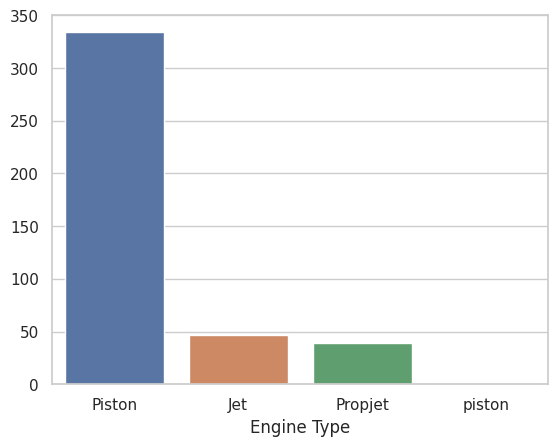

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style = 'whitegrid')

num_engine = df['Engine Type'].value_counts()

sns.barplot(x =num_engine.index, y =num_engine.values)
plt.show()

As we can see, we have some wrong data like 'piston'. We can  replace it with 'Piston'

In [11]:
# df['Engine Type'] = df['Engine Type'].str.replace('piston', 'Piston').astype(str)


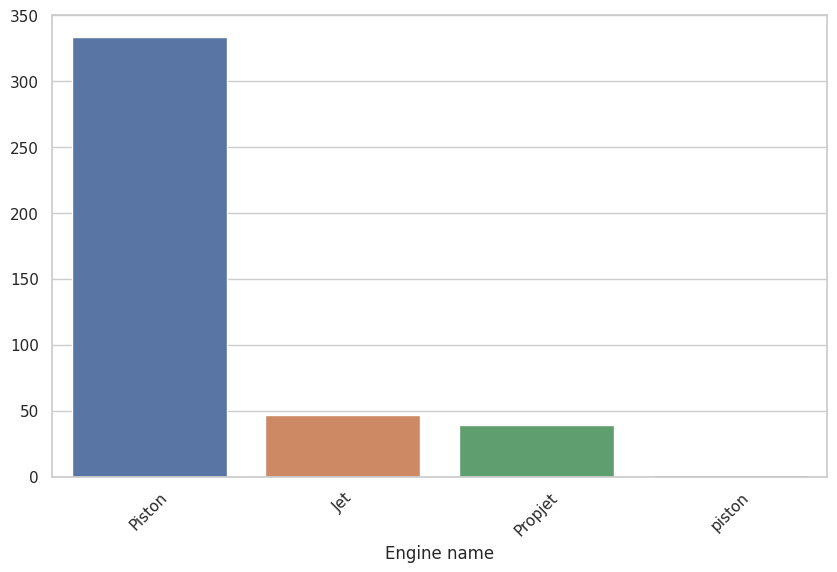

In [12]:
num_engine = df['Engine Type'].value_counts()

plt.figure(figsize = (10,6))
plt.xticks(rotation = 45)
sns.barplot(x =num_engine.index, y =num_engine.values)

plt.xlabel('Engine name')
plt.show()

And now, it is better.

### 2. Correlation matrix

Let's see how some features are correlated with each other

# Model selection & Evaluation

In [13]:
df.shape

(421, 16)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import warnings

warnings.filterwarnings('ignore')
df=  df.dropna()

X = df.drop(['Price'], axis = 1)
y = df['Price']

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

model = RandomForestRegressor()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print(mean_squared_error(y_test, y_pred))

55391017033.411766
